# salary data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv(r"D:\Excelr Assignment\Data Scientist\17-Support Vector Machine\SalaryData_Test(1).csv")

In [4]:
print(data.head())

   age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <

In [5]:
print(data.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [6]:
print(data.describe())

                age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000


In [7]:
label_encoder = LabelEncoder()

categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [8]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = svm_model.predict(X_test)

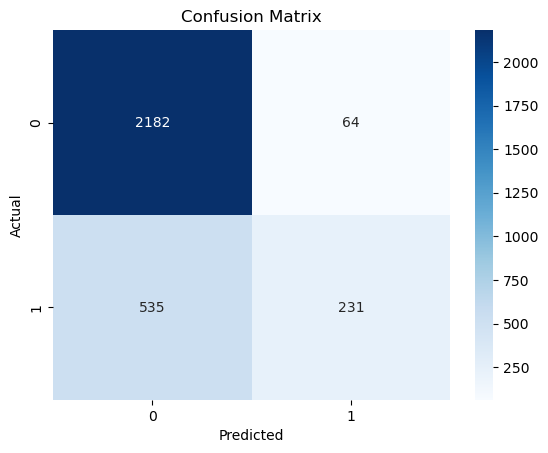

In [13]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      2246
        >50K       0.78      0.30      0.44       766

    accuracy                           0.80      3012
   macro avg       0.79      0.64      0.66      3012
weighted avg       0.80      0.80      0.77      3012



In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.11%


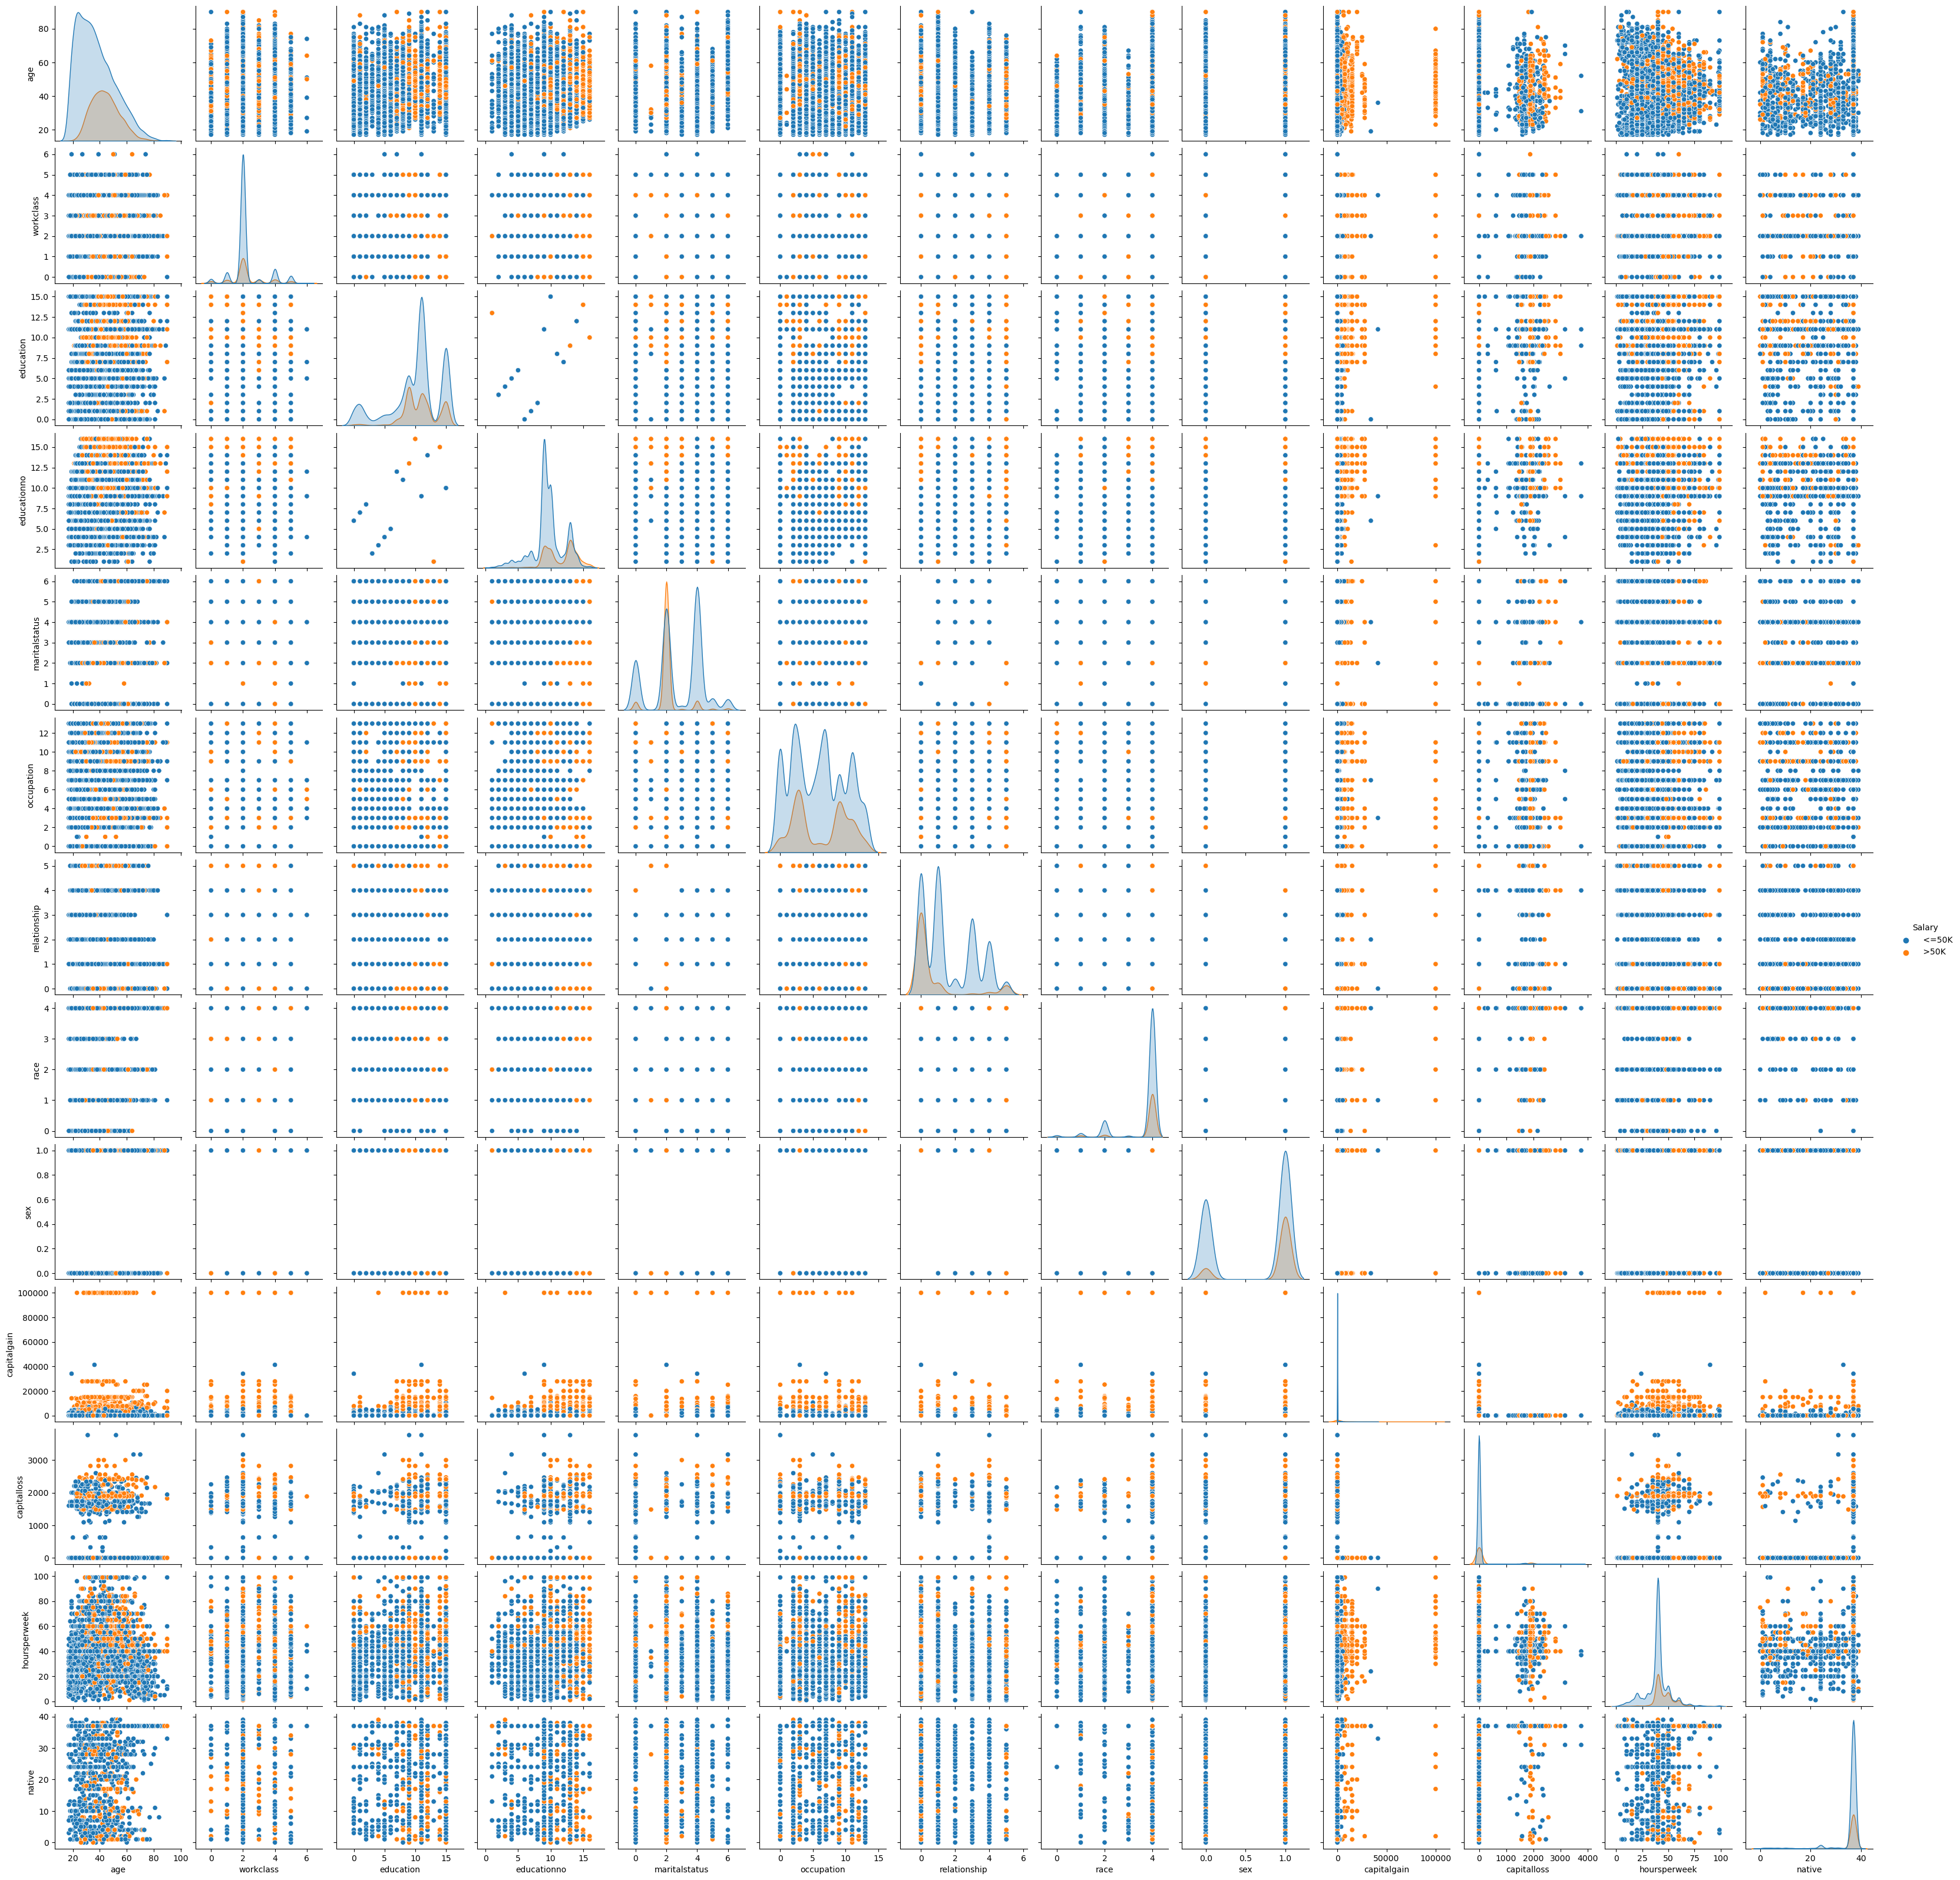

In [17]:
sns.pairplot(data, hue='Salary', diag_kind='kde')
plt.show()

C:\Users\ranji\AppData\Local\Temp\ipykernel_25860\1688383644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


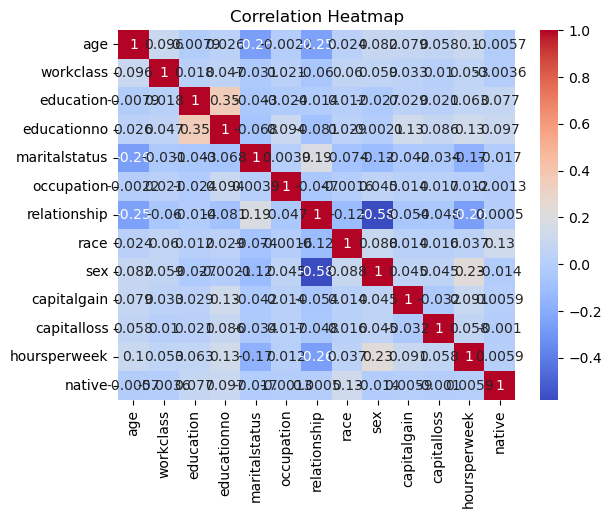

In [18]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

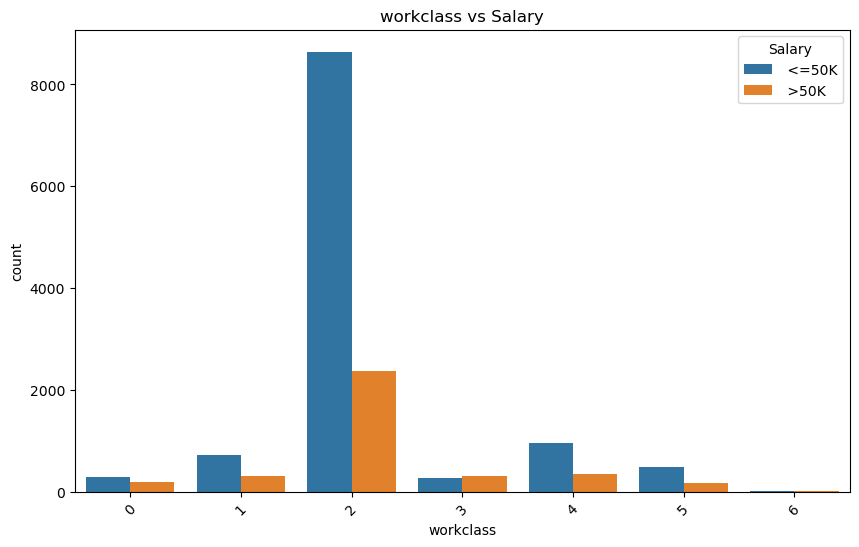

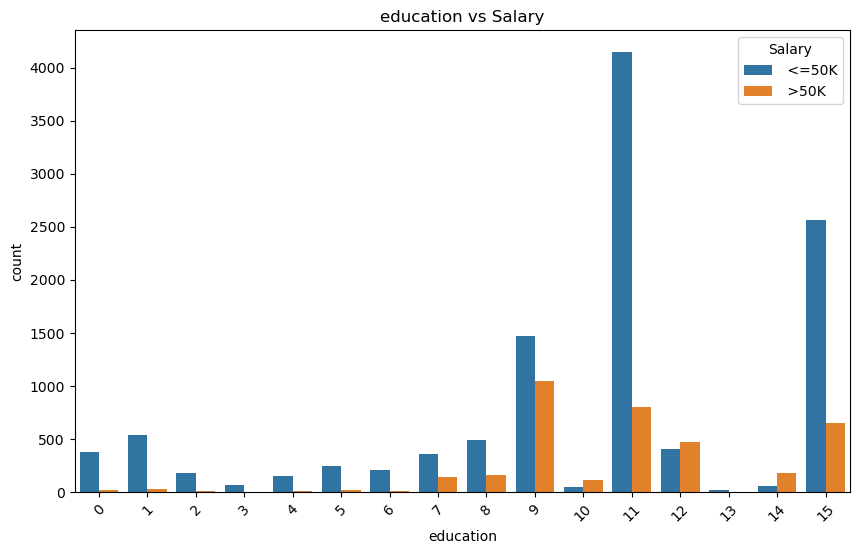

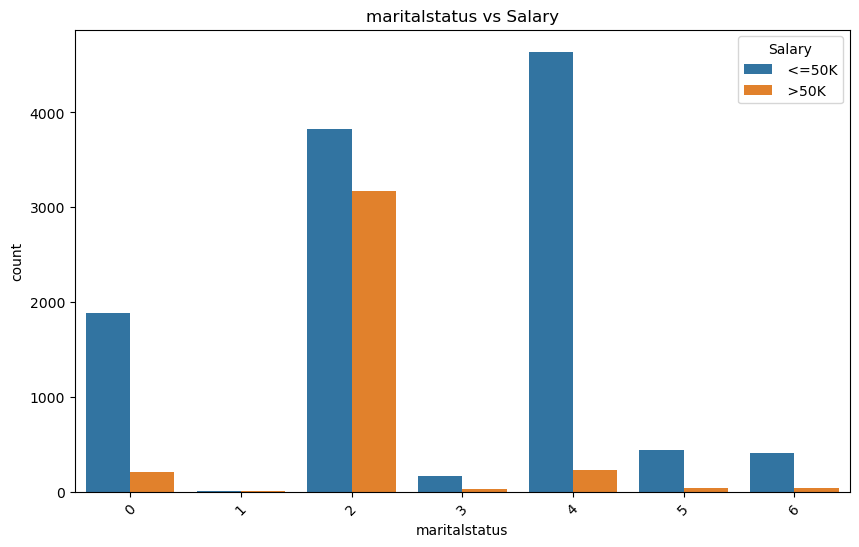

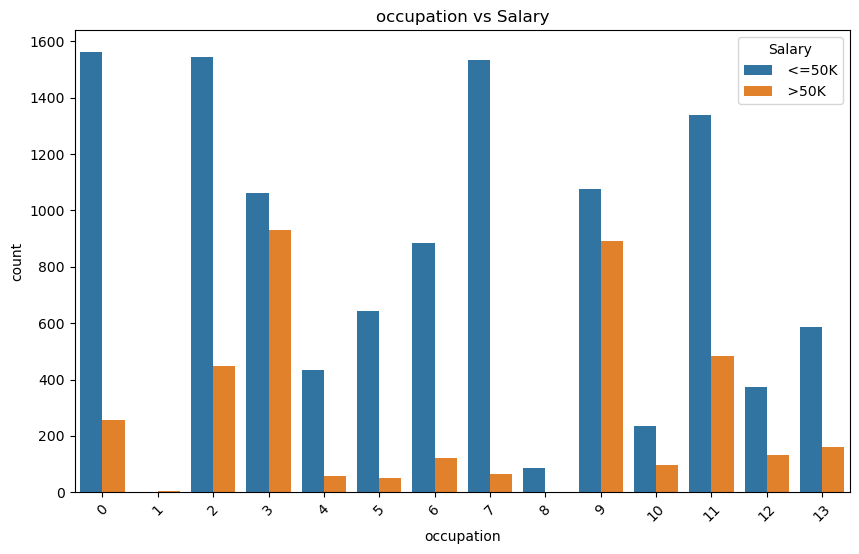

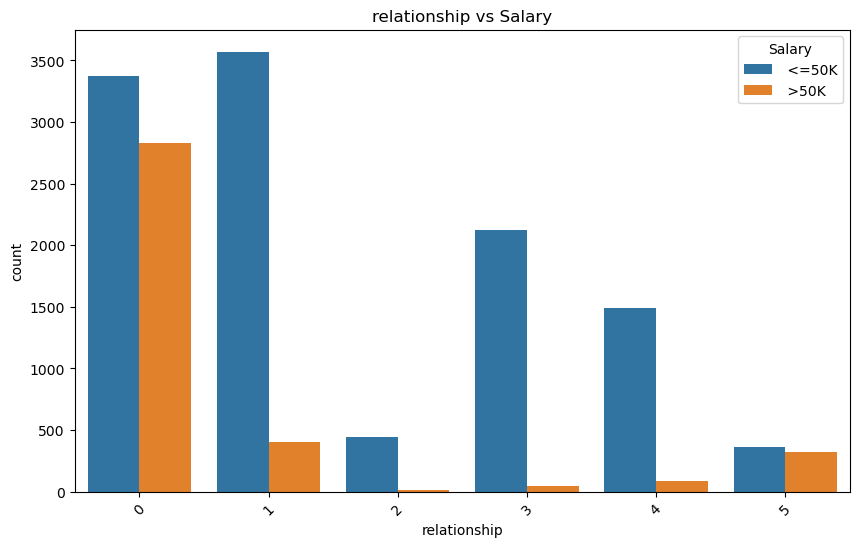

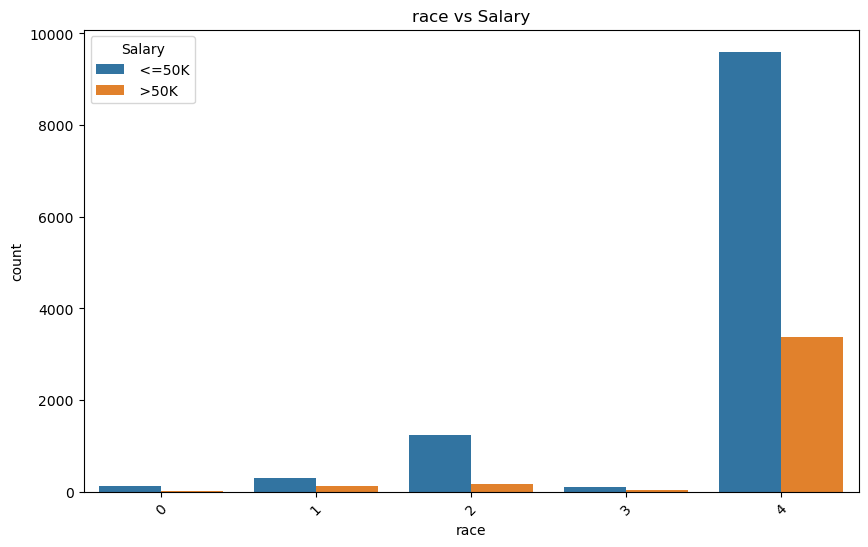

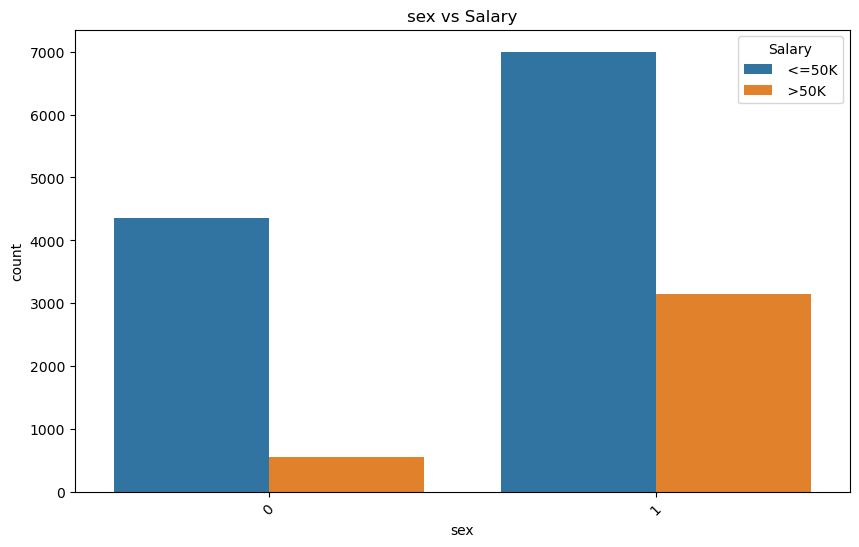

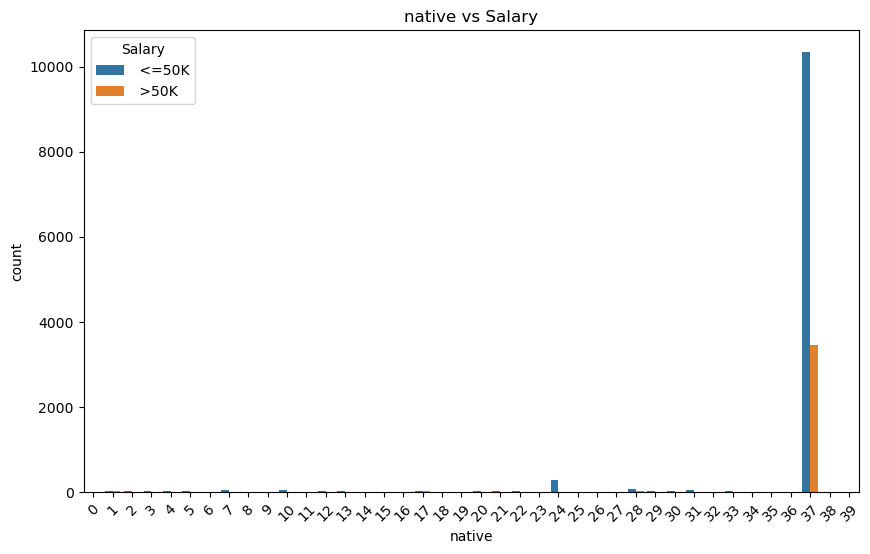

In [19]:
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Salary', data=data)
    plt.title(f'{col} vs Salary')
    plt.xticks(rotation=45)
    plt.show()

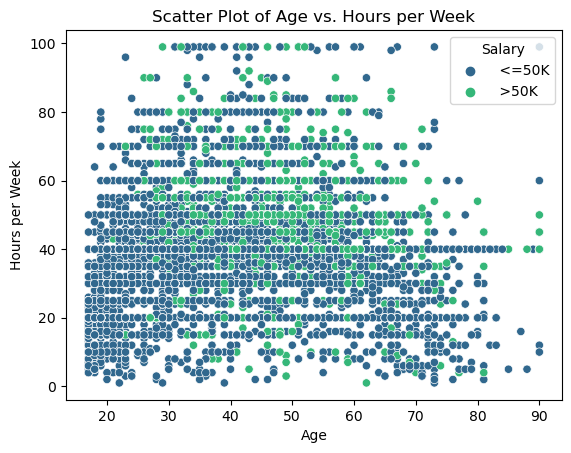

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatter plot using seaborn
sns.scatterplot(data=data, x='age', y='hoursperweek', hue='Salary', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Scatter Plot of Age vs. Hours per Week')
plt.show()

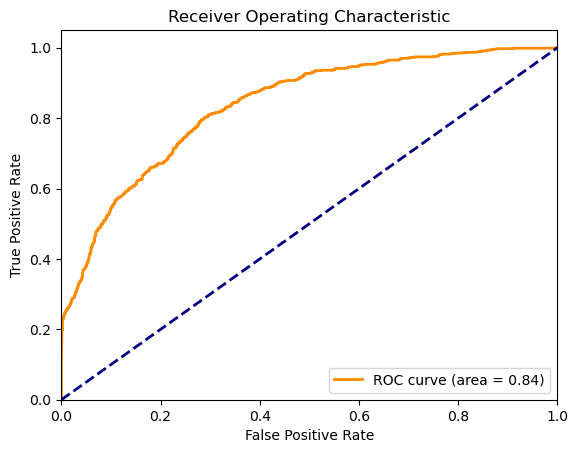

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode the Salary labels into binary format (0 or 1)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

y_prob = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

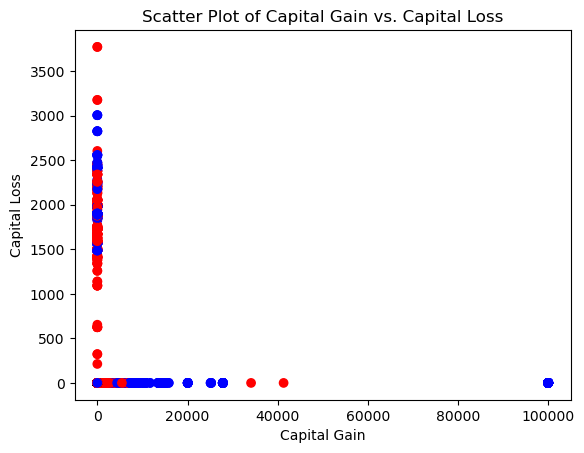

In [24]:
import matplotlib.pyplot as plt

# Create a mapping for 'Salary' values to colors
salary_colors = {' <=50K': 'red', ' >50K': 'blue'}

# Map the 'Salary' column to colors
colors = data['Salary'].map(salary_colors)

# Example scatter plot using matplotlib
plt.scatter(data['capitalgain'], data['capitalloss'], c=colors)
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.title('Scatter Plot of Capital Gain vs. Capital Loss')
plt.show()

## forest fires

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv(r"D:\Excelr Assignment\Data Scientist\17-Support Vector Machine\forestfires.csv")

In [30]:
# Encode categorical variables (month and day) using LabelEncoder
label_encoder = LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])

In [33]:
# Split the data into features (X) and target (y)
X = data.drop('size_category', axis=1)
y = data['size_category']

In [34]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

In [37]:
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [38]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)


In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.92
Confusion Matrix:
[[23  5]
 [ 3 73]]


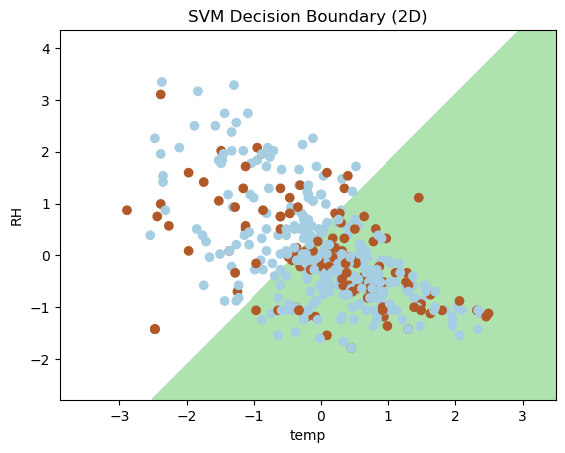

In [42]:
# Convert 'small' and 'large' labels to numerical labels (0 and 1, for example)
y_train_numeric = y_train.map({'small': 0, 'large': 1})

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train_numeric, cmap=plt.cm.Paired)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('SVM Decision Boundary (2D)')
plt.show()


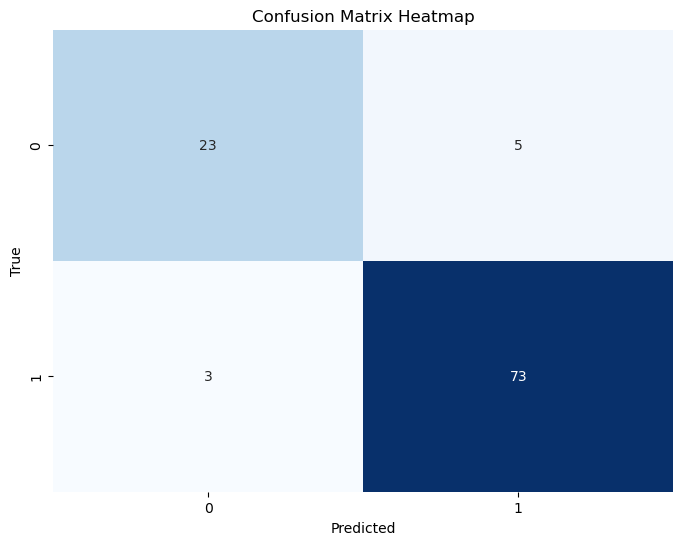

In [43]:
import seaborn as sns

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [44]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

       large       0.88      0.82      0.85        28
       small       0.94      0.96      0.95        76

    accuracy                           0.92       104
   macro avg       0.91      0.89      0.90       104
weighted avg       0.92      0.92      0.92       104



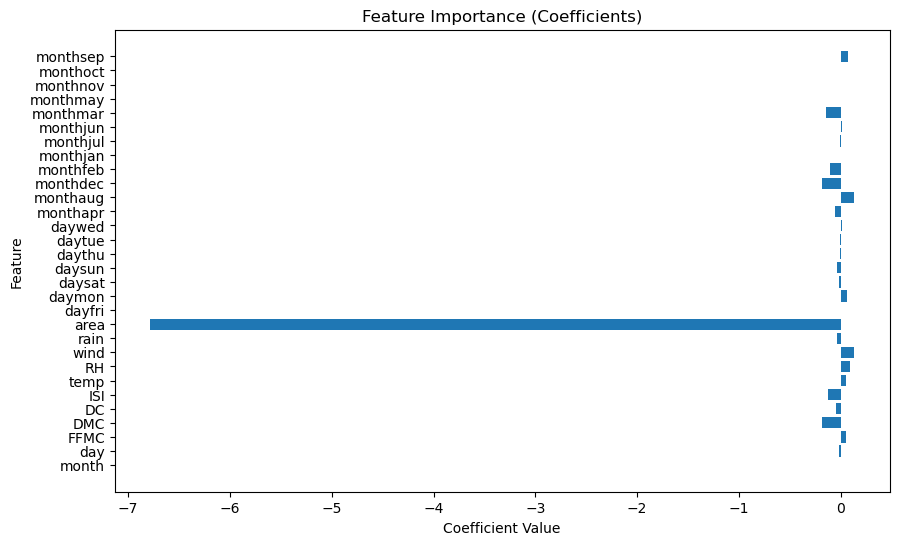

In [45]:
# Get the coefficients for each feature (works for linear kernel)
coefficients = svm_classifier.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients)')
plt.show()


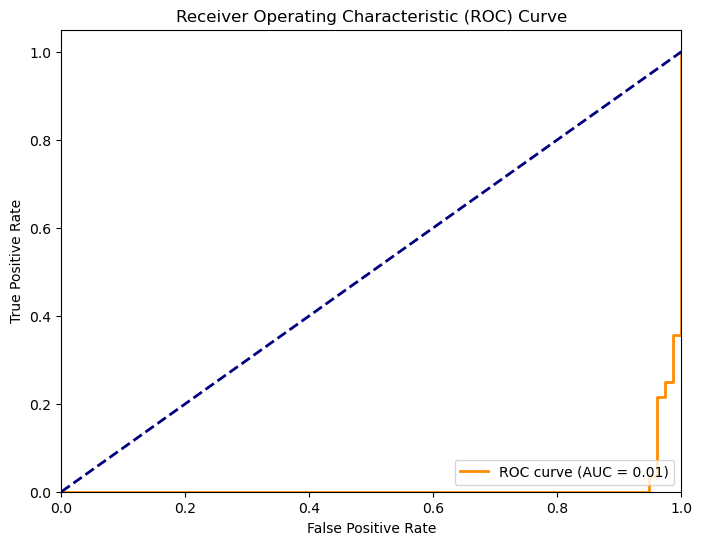

In [48]:
y_test_binary = y_test.map({'small': 0, 'large': 1})

y_probs = svm_classifier.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
